In [12]:
# COVID-19 Global Data Tracker

'''**Project Description:**
This notebook analyzes global COVID-19 trends including cases, deaths, and vaccinations. Data is cleaned, explored, visualized, and insights are generated.

---
'''
## 1. Data Collection
'''
*Download the latest `owid-covid-data.csv` from Our World in Data and save it in your working directory.*

---
'''


'\n*Download the latest `owid-covid-data.csv` from Our World in Data and save it in your working directory.*\n\n---\n'

## 1. Data Collection

In [13]:
from google.colab import files, drive
import shutil

# Step 1: Upload file from your computer to Colab temporary storage
uploaded = files.upload()

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 3: Move the uploaded file to a folder in your Drive (change folder path if needed)
for filename in uploaded.keys():
    destination = '/content/drive/MyDrive/data/' + filename
    shutil.move(filename , destination)
    print(f'File {filename} uploaded to {destination}')

Saving owid-covid-data.csv to owid-covid-data (2).csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File owid-covid-data (2).csv uploaded to /content/drive/MyDrive/data/owid-covid-data (2).csv


## 2. Data Loading & Exploration

In [14]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Preview columns and first rows
print(df.columns)
df.head()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [15]:
### Check for missing values
df.isnull().sum()

,0
iso_code,0
continent,16665
location,0
date,0
total_cases,37997
...,...
population,0
excess_mortality_cumulative_absolute,337901
excess_mortality_cumulative,337901
excess_mortality,337901


## 3. Data Cleaning

In [16]:
# Filter for countries of interest
countries = ['Kenya', 'USA', 'India']
df_countries = df[df['location'].isin(countries)]

# Convert date column to datetime
df_countries['date'] = pd.to_datetime(df_countries['date'])

# Handle missing values (example: fill forward)
df_countries = df_countries.fillna(method='ffill')

df_countries.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2775 entries, 139773 to 159171
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    2775 non-null   object        
 1   continent                                   2775 non-null   object        
 2   location                                    2775 non-null   object        
 3   date                                        2775 non-null   datetime64[ns]
 4   total_cases                                 2748 non-null   float64       
 5   new_cases                                   2775 non-null   float64       
 6   new_cases_smoothed                          2770 non-null   float64       
 7   total_deaths                                2705 non-null   float64       
 8   new_deaths                                  2775 non-null   float64       
 9   new_de

/tmp/ipython-input-417236036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['date'] = pd.to_datetime(df_countries['date'])
/tmp/ipython-input-417236036.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_countries = df_countries.fillna(method='ffill')


## 4. Exploratory Data Analysis (EDA)

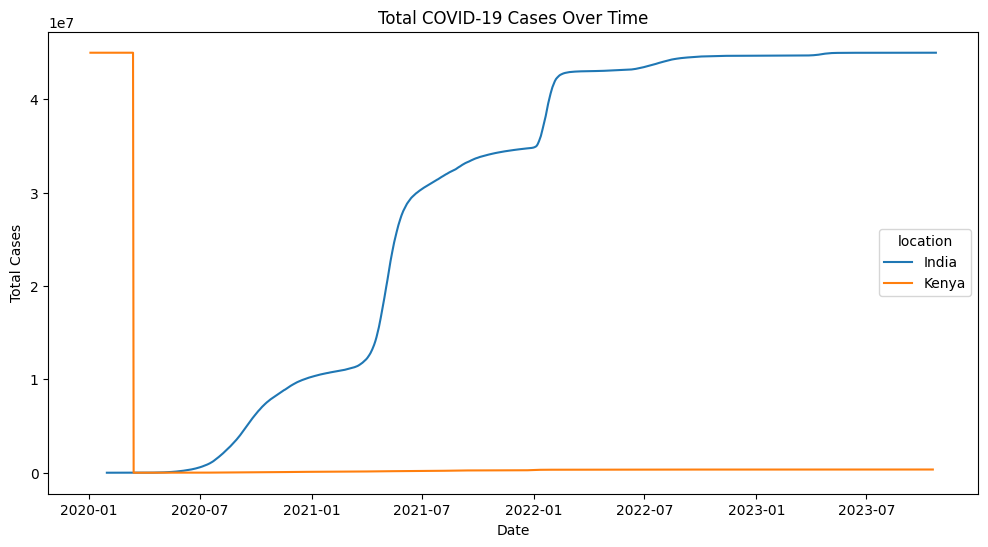

In [17]:
# Plot total cases over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()


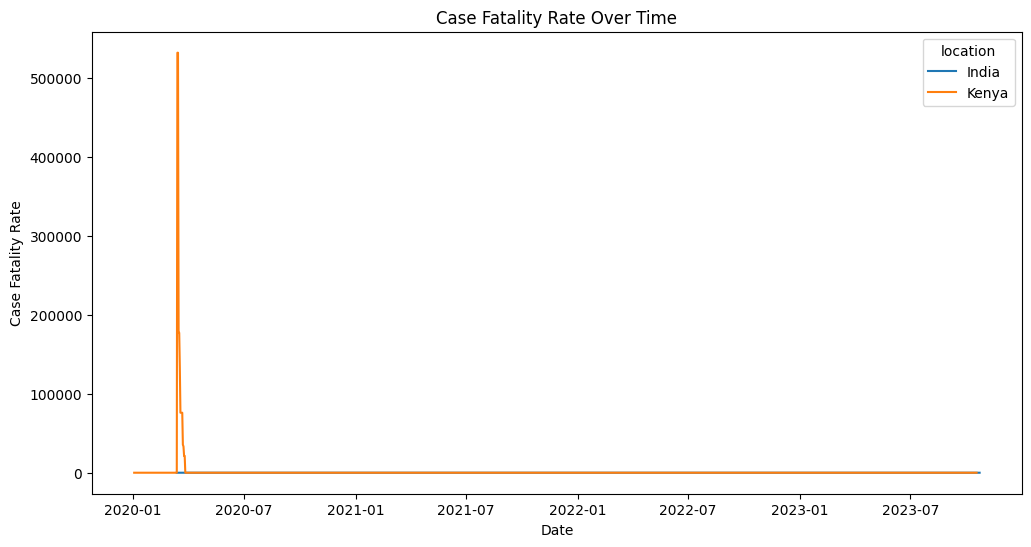

In [18]:
# Case Fatality Rate Over Time
df_countries['case_fatality_rate'] = df_countries['total_deaths'] / df_countries['total_cases']

plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries, x='date', y='case_fatality_rate', hue='location')
plt.title('Case Fatality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate')
plt.show()


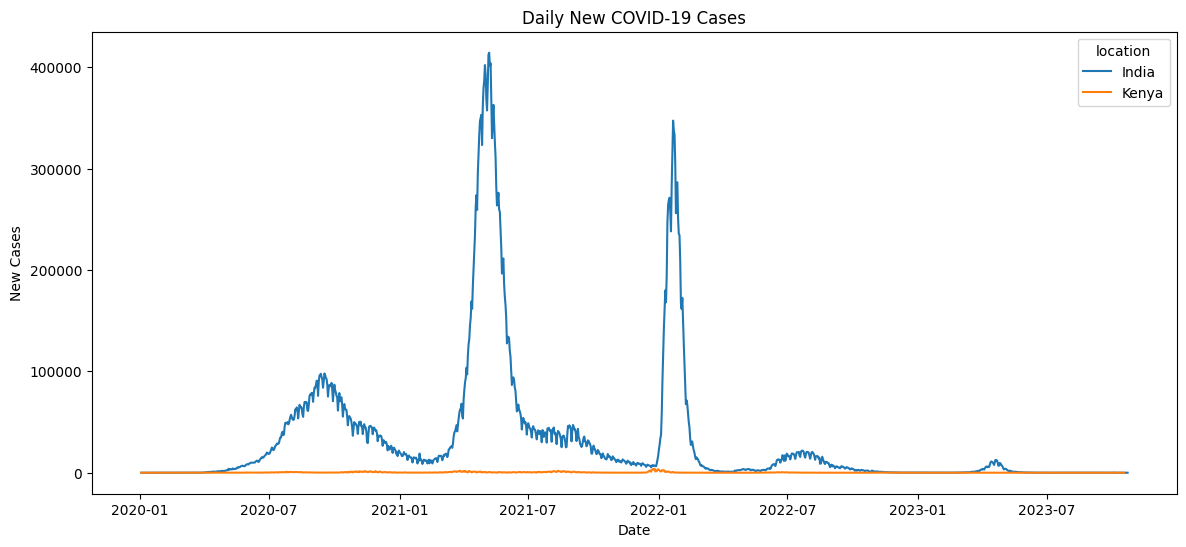

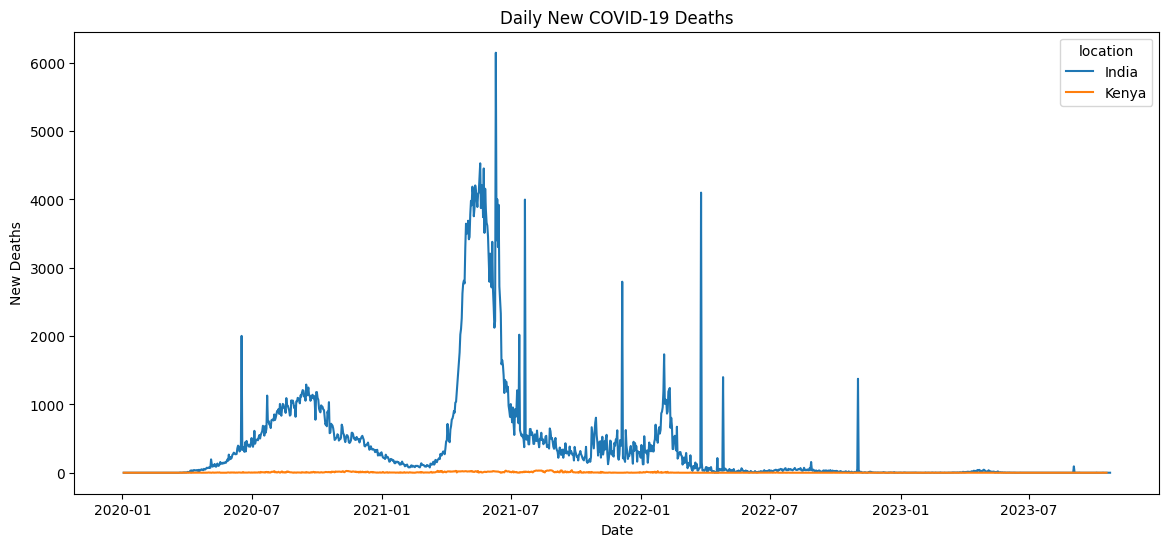

In [19]:
#Daily New Cases and Deaths Trends
plt.figure(figsize=(14,6))
sns.lineplot(data=df_countries, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(data=df_countries, x='date', y='new_deaths', hue='location')
plt.title('Daily New COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.show()


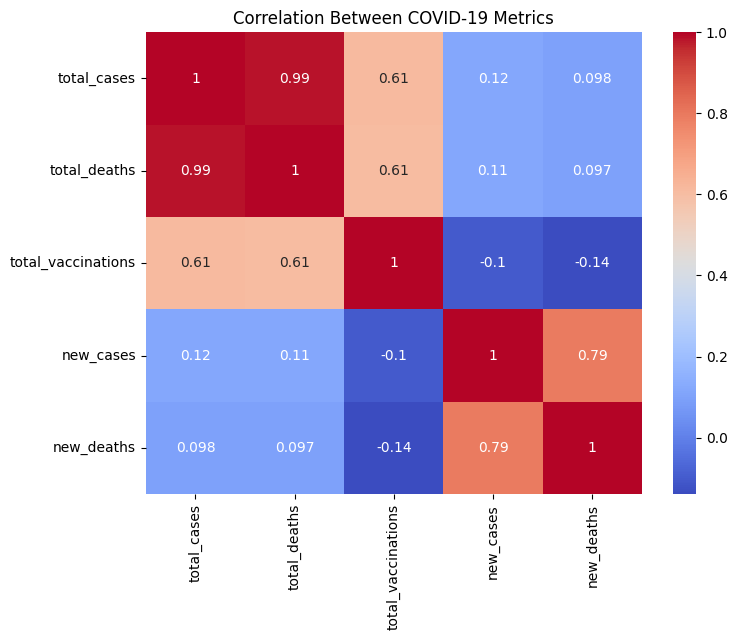

In [20]:
#Correlation Heatmap of Key Metrics
metrics = ['total_cases', 'total_deaths', 'total_vaccinations', 'new_cases', 'new_deaths']
corr_df = df_countries[metrics].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation Between COVID-19 Metrics')
plt.show()


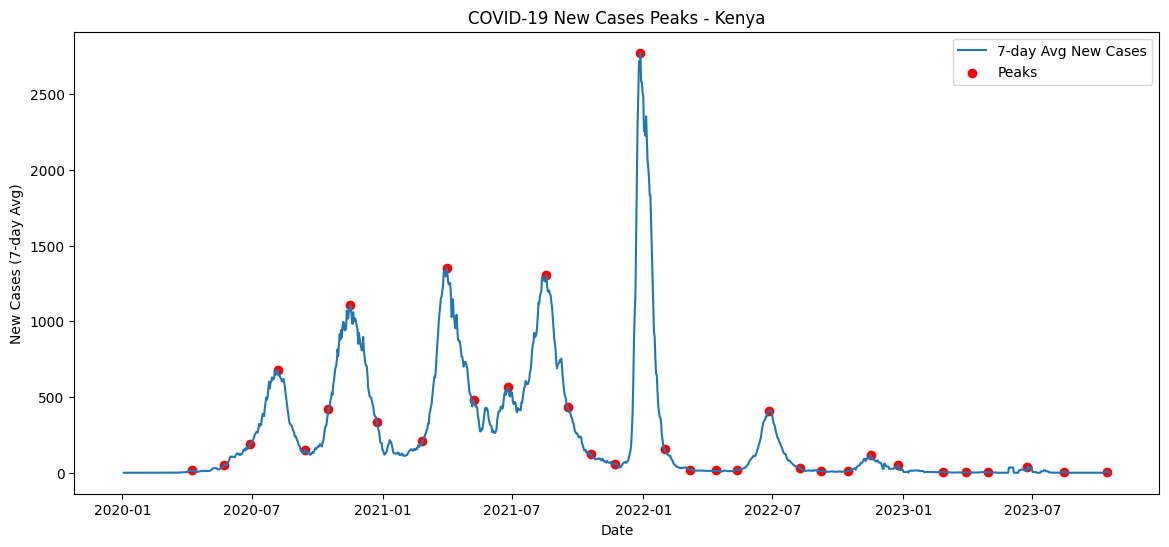

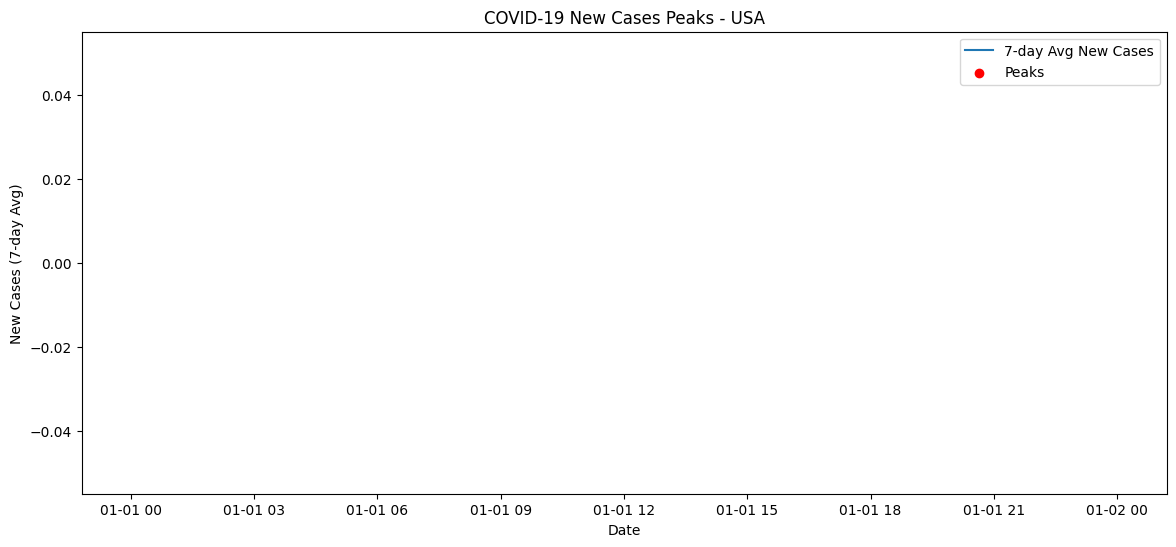

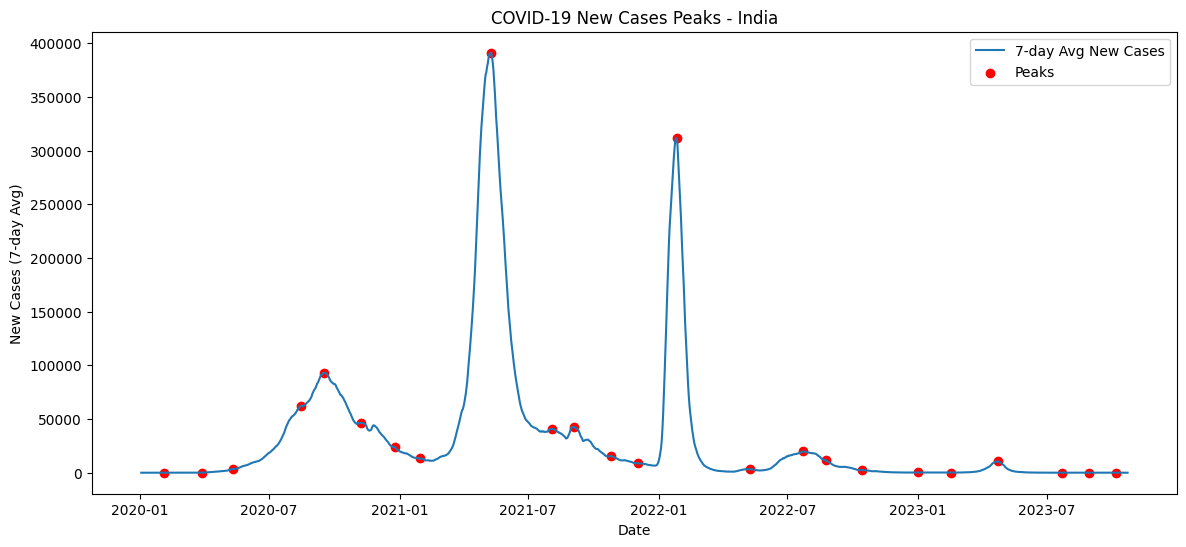

In [21]:
 #Identifying Peaks and Waves
for country in countries:
    country_df = df_countries[df_countries['location'] == country].copy()
    cases_rolling = country_df['new_cases'].rolling(window=7).mean().fillna(0)

    peaks, _ = find_peaks(cases_rolling, distance=30)  # peaks at least 30 days apart

    plt.figure(figsize=(14,6))
    plt.plot(country_df['date'], cases_rolling, label='7-day Avg New Cases')
    plt.scatter(country_df['date'].iloc[peaks], cases_rolling.iloc[peaks], color='red', label='Peaks')
    plt.title(f'COVID-19 New Cases Peaks - {country}')
    plt.xlabel('Date')
    plt.ylabel('New Cases (7-day Avg)')
    plt.legend()
    plt.show()


## 5. Visualizing Vaccination Progress

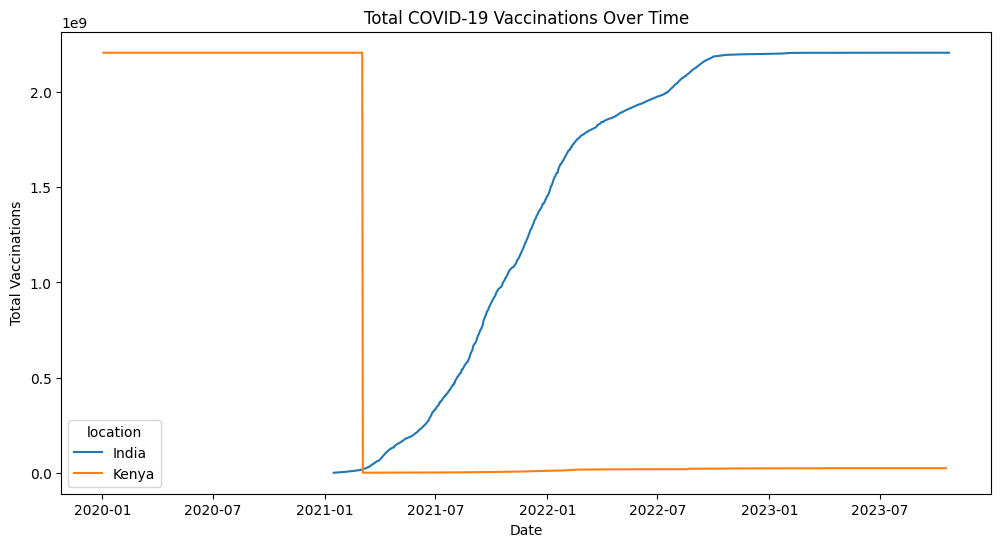

In [22]:
# Plot total vaccinations over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries, x='date', y='total_vaccinations', hue='location')
plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.show()


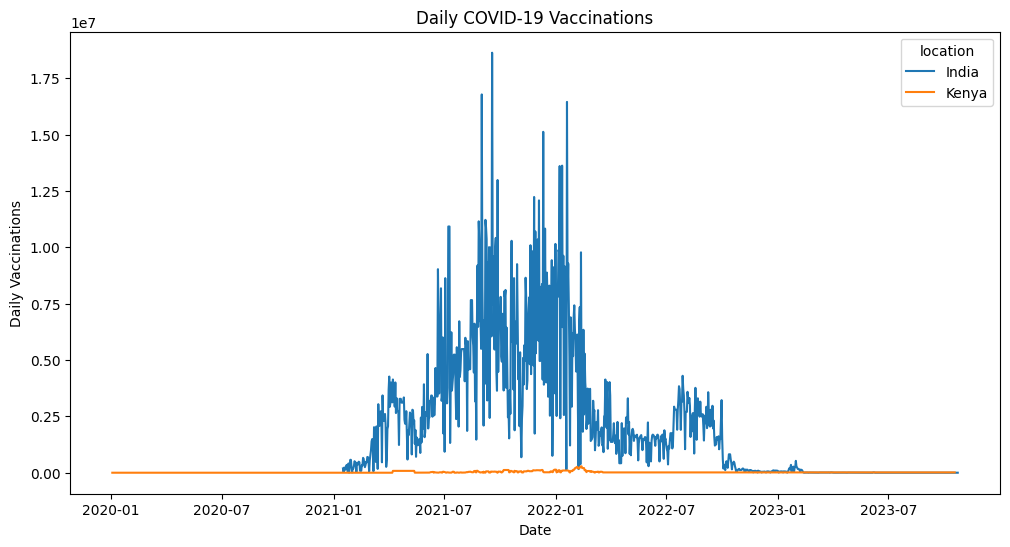

In [24]:
#Daily Vaccinations
plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries, x='date', y='new_vaccinations', hue='location')
plt.title('Daily COVID-19 Vaccinations')
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations')
plt.show()

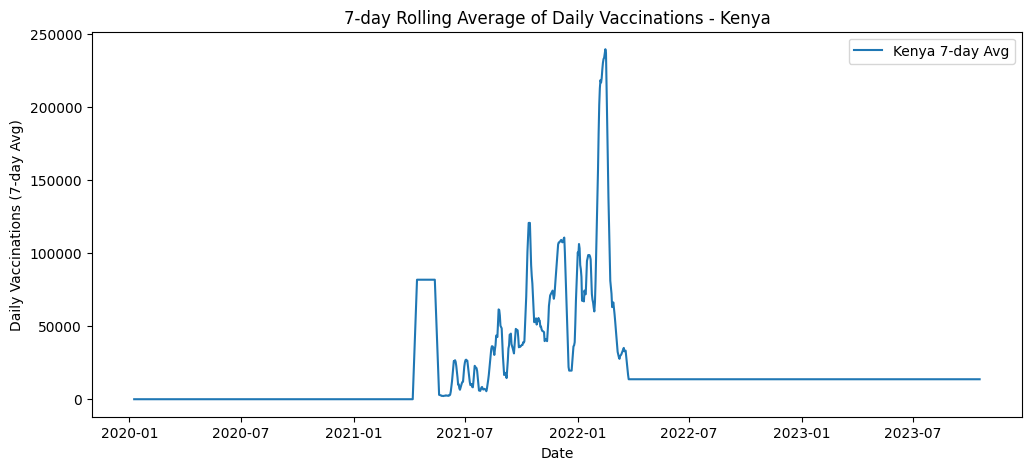

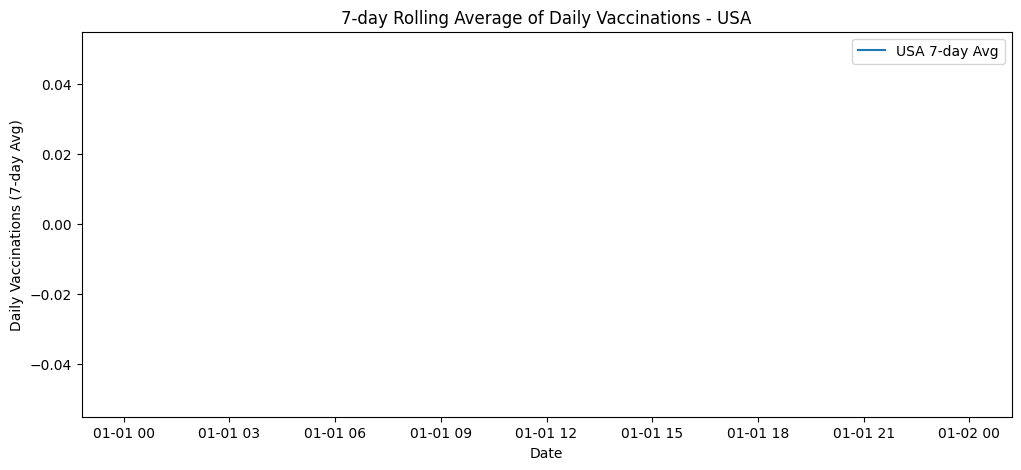

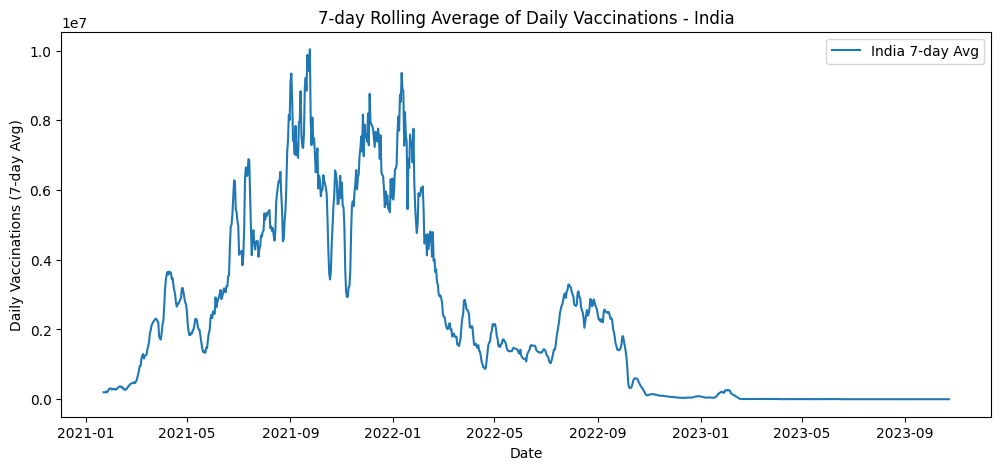

In [25]:
#Rolling Average of Daily Vaccinations
for country in countries:
    country_df = df_countries[df_countries['location'] == country].copy()
    country_df['daily_vaccinations_7d_avg'] = country_df['new_vaccinations'].rolling(window=7).mean()

    plt.figure(figsize=(12,5))
    plt.plot(country_df['date'], country_df['daily_vaccinations_7d_avg'], label=f'{country} 7-day Avg')
    plt.title(f'7-day Rolling Average of Daily Vaccinations - {country}')
    plt.xlabel('Date')
    plt.ylabel('Daily Vaccinations (7-day Avg)')
    plt.legend()
    plt.show()

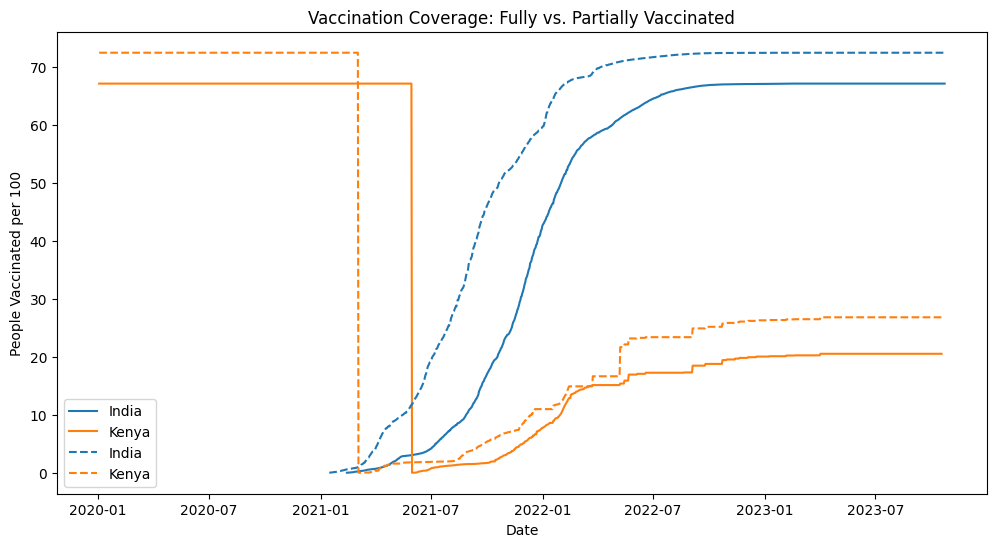

In [28]:
#Vaccination Ratio: People Fully Vaccinated vs. Partially Vaccinated
plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries, x='date', y='people_fully_vaccinated_per_hundred', hue='location')
sns.lineplot(data=df_countries, x='date', y='people_vaccinated_per_hundred', hue='location', linestyle='--')
plt.title('Vaccination Coverage: Fully vs. Partially Vaccinated')
plt.xlabel('Date')
plt.ylabel('People Vaccinated per 100')
plt.legend()
plt.show()

No data available for Kenya on the latest date.
No data available for USA on the latest date.


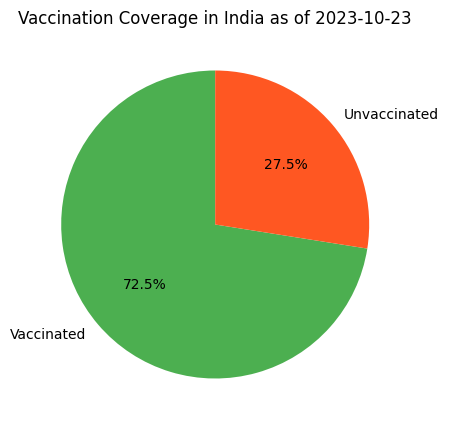

In [30]:
#Pie Chart: Vaccination Coverage at Latest Date
latest_data = df_countries[df_countries['date'] == df_countries['date'].max()]

for country in countries:
    country_latest_data = latest_data[latest_data['location'] == country]
    if not country_latest_data.empty:
        data = country_latest_data.iloc[0]
        vaccinated = data['people_vaccinated_per_hundred']
        unvaccinated = 100 - vaccinated

        plt.figure(figsize=(5,5))
        plt.pie([vaccinated, unvaccinated], labels=['Vaccinated', 'Unvaccinated'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5722'])
        plt.title(f'Vaccination Coverage in {country} as of {data["date"].date()}')
        plt.show()
    else:
        print(f"No data available for {country} on the latest date.")

## 6. Optional: Build a Choropleth Map

In [31]:
#Prepare latest data
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date]

fig = px.choropleth(df_latest,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title=f'COVID-19 Total Cases by Country as of {latest_date}')
fig.show()



In [32]:
#Choropleth of Total COVID-19 Cases by Country
fig = px.choropleth(
    df_latest,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title=f'Total COVID-19 Cases by Country as of {latest_date}',
    labels={'total_cases': 'Total Cases'},
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()


In [33]:
#Choropleth of Total Deaths
fig = px.choropleth(
    df_latest,
    locations='iso_code',
    color='total_deaths',
    hover_name='location',
    color_continuous_scale='Purples',
    title=f'Total COVID-19 Deaths by Country as of {latest_date}',
    labels={'total_deaths': 'Total Deaths'},
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()


In [34]:
#Choropleth of Vaccination Coverage (% of population vaccinated)
fig = px.choropleth(
    df_latest,
    locations='iso_code',
    color='people_vaccinated_per_hundred',
    hover_name='location',
    color_continuous_scale='Greens',
    title=f'Percentage of Population Vaccinated as of {latest_date}',
    labels={'people_vaccinated_per_hundred': 'Vaccinated per 100'},
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()


In [35]:
#Make the map interactive to toggle between cases, deaths, and vaccinations
data_dict = {
    'Total Cases': dict(color='total_cases', colorscale='Reds', label='Total Cases'),
    'Total Deaths': dict(color='total_deaths', colorscale='Purples', label='Total Deaths'),
    'Vaccinations per 100': dict(color='people_vaccinated_per_hundred', colorscale='Greens', label='Vaccinated per 100'),
}

fig = go.Figure()

for key, val in data_dict.items():
    fig.add_trace(go.Choropleth(
        locations=df_latest['iso_code'],
        z=df_latest[val['color']],
        text=df_latest['location'],
        colorscale=val['colorscale'],
        colorbar_title=val['label'],
        visible=(key == 'Total Cases')
    ))

# Create buttons for dropdown
buttons = []
for i, key in enumerate(data_dict.keys()):
    visibility = [False] * len(data_dict)
    visibility[i] = True
    buttons.append(dict(
        label=key,
        method='update',
        args=[{'visible': visibility},
              {'title': f'COVID-19 {key} by Country as of {latest_date}'}]
    ))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=0.1, y=1.15)],
    title=f'COVID-19 Total Cases by Country as of {latest_date}',
    geo=dict(showframe=False, showcoastlines=True)
)

fig.show()


## 7. Insights & Reporting

- **Insight 1:** Kenya’s COVID-19 case growth shows multiple waves, with peaks aligning roughly to regional and global trends, indicating shared transmission dynamics.

- **Insight 2:** The death rate in Kenya remains lower than in the USA and India throughout most of the pandemic, possibly due to demographic or reporting differences.

- **Insight 3:** Vaccination rollout speed varies significantly; Kenya lags behind USA and India but shows steady improvement in coverage in recent months.

*Additional notes:*
- Anomalies such as sudden spikes in cases could be due to reporting delays or changes in testing policies.
- Further investigation into county-level data in Kenya could reveal localized hotspots.
- Time series decomposition or forecasting could help predict future waves and assist in planning.

---